In [16]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# read the IHDP dataset.
import pandas as pd
 
data= pd.read_csv("C:\\Users\\Sanika\\Downloads\\ihdp.csv", header = None)
col =  ["t", "yf", "ycf", "ite"]

In [77]:
for i in range(1,26):
    col.append("x"+str(i))
data.columns = col
data = data.astype({"t": bool})
data.head()

AttributeError: 'str' object has no attribute 'append'

In [66]:
df = data.copy()

# Pre-processing

In [67]:
data.shape

In [78]:
#checking for missing values
data.isna().sum()

t      0
yf     0
ycf    0
ite    0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
dtype: int64

In [79]:
#checking and removing duplicate values in dataset
data.duplicated().sum()
data = data.drop_duplicates()
print(data.shape)

(748, 29)


In [81]:
#defining target variable
features = data.loc[:,data.columns != 'y']
target = data['y']

KeyError: 'y'

# Features

In [82]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(features,target)

ValueError: could not convert string to float: 'x2'

In [83]:
print(model.feature_importances_)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.2, random_state=0)

In [ ]:
cate_col = ['x4','x5','x6','x15','t']
plt.figure(figsize=(18,14))
for i, column in zip(range(1,21), cate_col):
    plt.subplot(5,4,i)
    plt.subplots_adjust(left=0.1,
                       right= 0.8,
                       bottom= 0.1,
                       top= 0.8,
                       hspace= 0.3,
                       wspace= 0.3)
    sns.countplot(data[column])
    plt.title('Countplot of {}'.format(col))
plt.savefig('countplt_IHDP.png')

In [ ]:
num_col = ['x1', 'x2', 'x3']
plt.figure(figsize = (15,17))

def plot(col):
    sns.displot(data, x=col, binwidth=1)
    plt.title('Dist plot of{}'.format(col))
    plt.show()
    plt.savefig('Dist plot of{}'.format(col))
    
for col in num_col:
    plot(col)

In [ ]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,14))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")
plt.davefig('corrl_IHDP.png')

# Causal Model

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display

In [ ]:
# Create a causal model from the data and the "x" variables as common causes.
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
 
model=CausalModel(
        data = data,
        treatment='t',
        outcome='yf',
        common_causes=xs.split('+')
        )

In [69]:
df.columns

Index(['t', 'yf', 'ycf', 'ite', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25'],
      dtype='object')

In [72]:
df.dtypes

t        bool
yf     object
ycf    object
ite    object
x1     object
x2     object
x3     object
x4     object
x5     object
x6     object
x7     object
x8     object
x9     object
x10    object
x11    object
x12    object
x13    object
x14    object
x15    object
x16    object
x17    object
x18    object
x19    object
x20    object
x21    object
x22    object
x23    object
x24    object
x25    object
dtype: object

In [71]:
features = data.loc[:, data.columns != 'yf']
target = data['yf']

In [73]:
treatment = 't'
outcome = 'yf'
features = ['x1', 'x2', 'x3']

NameError: name 'Images' is not defined

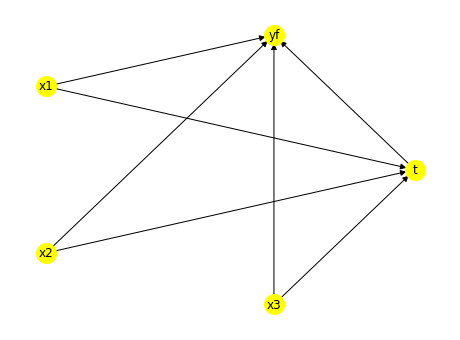

In [74]:
model = CausalModel(
data =df,
treatment = treatment,
outcome = outcome,
common_causes = features,
instruments = None,
effect_modifiers = None)

model.view_model()
display(Images(filename='causal_model.png'))

In [75]:
#Identify the causal effect
identified_estimand = model.identify_effect()

data_1 = data[data["t"]==1]
data_0 = data[data["t"]==0]
print("ATE", np.mean(data_1["yf"])- np.mean(data_0["yf"]))

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")


AttributeError: module 'networkx.algorithms' has no attribute 'd_separated'

In [76]:
print("Causal Estimate is " + str(estimate.value))

NameError: name 'estimate' is not defined